<a href="https://colab.research.google.com/github/StephenJohnson-CardiffUni/ProjectNSNSmerger/blob/main/DataLoadAndHandle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

JINA Fe/H data from Asplund 2009

"Throughout this review, we adopt the customary astronomical scale for logarithmic abundances where hydrogen is defined to be log (H) = 12.00, i.e. log(X) = log(NX/NH) + 12, where NX and NH are the number
densities of element X and hydrogen, respectively."

In [1]:
def JINAtxtRead(file_path):
  data = []
  with open(file_path, 'r') as file:
      for idx, line in enumerate(file):
          # Skip the second row (just contains ---- as seperators)
          if idx == 1:
              continue
          row = line.strip().split()
          data.append(row)
      return data

def SAGAtxtRead(file_path):
  data = []
  with open(file_path, 'r') as file:
      for line in file:
        row = line.strip().split()
        data.append(row)
      #rearange headers (# col is blank, Referance col has no header. Matched them up)
      data[0].append(data[0].pop(0))
  return data

Will make several plots to illustrate the trend of metals over time (Mg/Fe) and contrast with the trend of Eu/Fe.

FIrst with data from JINA

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

MgData = np.array(JINAtxtRead('/content/MgFe.txt'))
EuData = np.array(JINAtxtRead('/content/EuFe.txt'))

# print("Data Type of Column 4:", MgData[1:, 4].dtype)
# print("Data Type of Column 5:", MgData[1:, 5].dtype)
# print("Data Type of Column 4:", EuData[1:, 4].dtype)
# print("Data Type of Column 5:", EuData[1:, 5].dtype)

These arrays follow =>
           

0:'JINA_ID' 1:'Ref' 2:'Name' 3:'Simbad_Identifier' 4:'Fe/H' 5:'Mg/Fe'



In [3]:
##crude attempt to sanatise upper limits to point values
def sanitize_JINA_Data(array):
    sanitized_data =[]
    for value in array:

      if value.startswith('<'):  # Check for upper limits
          sanitized_data.append(float(value[1:]))  # Replace with limit value (after '<')
      else:
          sanitized_data.append(float(value))

    sanitized_data = np.array(sanitized_data)
    return sanitized_data

sanitized_EuDataX = sanitize_JINA_Data(EuData[1:, 4])
sanitized_EuDataY = sanitize_JINA_Data(EuData[1:, 5])
sanitized_MgDataX = sanitize_JINA_Data(MgData[1:, 4])
sanitized_MgDataY = sanitize_JINA_Data(MgData[1:, 5])


# print("Data Type of Column 4:", sanitized_MgDataX.dtype)
# print("Data Type of Column 5:", sanitized_MgDataY.dtype)
# print("Data Type of Column 4:", sanitized_EuDataX.dtype)
# print("Data Type of Column 5:", sanitized_EuDataY.dtype)

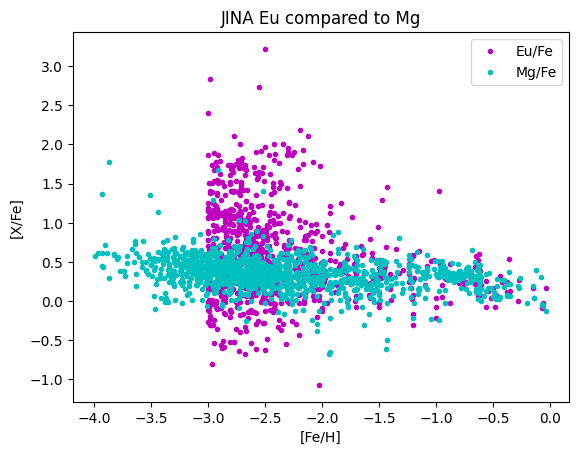

In [4]:
plt.plot(sanitized_EuDataX, sanitized_EuDataY, "m.", label="Eu/Fe")
plt.plot(sanitized_MgDataX, sanitized_MgDataY,"c.", label="Mg/Fe")

plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))

plt.xlabel("[Fe/H]")
plt.ylabel("[X/Fe]")

plt.title("JINA Eu compared to Mg")

plt.show()

